In [13]:
## Create noisy sine wave data time series
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

N = 100000 # number of data points
t = np.linspace(0, 50*np.pi, N)
data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

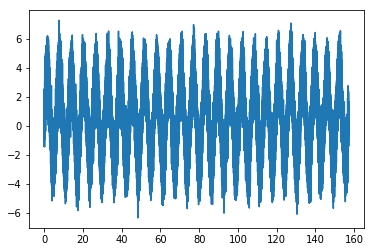

In [14]:
new_data = pd.DataFrame(zip(t, data)).values
plt.plot(t, new_data[:,1])

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [16]:
def timeseries_to_lstm(timeseries_data, shift=1, chunk=5):
    chunk = 5
    timeseries_data = pd.DataFrame(data)
    timeseries_data.head()
    d = pd.concat([timeseries_data, timeseries_data.shift(chunk)], 1)
    

In [17]:
chunk = 30
shift = 1
timeseries_data = pd.DataFrame(data)
timeseries_data.head()
chunk_number_of_shifts = []
for i in range(chunk):
    chunk_number_of_shifts.append(timeseries_data.shift(i))
    
d = pd.concat(chunk_number_of_shifts, 1)
d.columns = range(d.shape[1])
d.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.806762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.963984,1.806762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.289870,-0.963984,1.806762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.270273,2.289870,-0.963984,1.806762,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.427861,2.270273,2.289870,-0.963984,1.806762,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.153094,-1.427861,2.270273,2.289870,-0.963984,1.806762,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.979271,1.153094,-1.427861,2.270273,2.289870,-0.963984,1.806762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.267458,0.979271,1.153094,-1.427861,2.270273,2.289870,-0.963984,1.806762,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.359725,-0.267458,0.979271,1.153094,-1.427861,2.270273,2.289870,-0.963984,1.806762,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.314623,2.359725,-0.267458,0.979271,1.153094,-1.427861,2.270273,2.289870,-0.963984,1.806762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
d.values[5:,:][0:10,:]

array([[ 1.15309403, -1.42786116,  2.27027286,  2.28987022, -0.96398412,
         1.8067617 ,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.97927075,  1.15309403, -1.42786116,  2.27027286,  2.28987022,
        -0.96398412,  1.8067617 ,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [-0.26745825,  0.97927075,  1.15309403, -1.42786116,  2.27027286,
         2.28987022, -0.96398412,  1.8067617 ,   

In [19]:
lstm_data = d.values[30:,:]
print lstm_data

[[ 1.27914864  1.42572955 -1.06479516 ...,  2.27027286  2.28987022
  -0.96398412]
 [ 0.82971091  1.27914864  1.42572955 ..., -1.42786116  2.27027286
   2.28987022]
 [ 0.96422862  0.82971091  1.27914864 ...,  1.15309403 -1.42786116
   2.27027286]
 ..., 
 [ 0.3105624   0.43843702  1.23193986 ...,  0.60181366 -1.37204144
  -0.66709636]
 [ 0.78666199  0.3105624   0.43843702 ...,  1.23549332  0.60181366
  -1.37204144]
 [ 0.57918924  0.78666199  0.3105624  ...,  1.45140324  1.23549332
   0.60181366]]


In [20]:
lstm_data.shape

(99970, 30)

In [21]:
train = lstm_data[:3000, :]
test = lstm_data[3000:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

((3000, 1, 29), (3000,), (96970, 1, 29), (96970,))


In [22]:
train_y

array([-0.96398412,  2.28987022,  2.27027286, ..., -1.19451053,
       -2.67739274, -2.72816166])

Train on 3000 samples, validate on 96970 samples
Epoch 1/50
3s - loss: 1.2749 - val_loss: 1.0147
Epoch 2/50
2s - loss: 0.8662 - val_loss: 0.8353
Epoch 3/50
2s - loss: 0.8377 - val_loss: 0.8218
Epoch 4/50
2s - loss: 0.8184 - val_loss: 0.8181
Epoch 5/50
2s - loss: 0.8099 - val_loss: 0.8190
Epoch 6/50
2s - loss: 0.8046 - val_loss: 0.8222
Epoch 7/50
2s - loss: 0.8007 - val_loss: 0.8240
Epoch 8/50
2s - loss: 0.7986 - val_loss: 0.8262
Epoch 9/50
2s - loss: 0.7978 - val_loss: 0.8304
Epoch 10/50
2s - loss: 0.7959 - val_loss: 0.8329
Epoch 11/50
3s - loss: 0.8023 - val_loss: 0.8440
Epoch 12/50
2s - loss: 0.7961 - val_loss: 0.8382
Epoch 13/50
2s - loss: 0.8109 - val_loss: 0.8428
Epoch 14/50
2s - loss: 0.7949 - val_loss: 0.8326
Epoch 15/50
2s - loss: 0.8121 - val_loss: 0.8344
Epoch 16/50
2s - loss: 0.7913 - val_loss: 0.8267
Epoch 17/50
2s - loss: 0.8195 - val_loss: 0.8333
Epoch 18/50
2s - loss: 0.7926 - val_loss: 0.8275
Epoch 19/50
2s - loss: 0.8157 - val_loss: 0.8315
Epoch 20/50
2s - loss: 0.7878

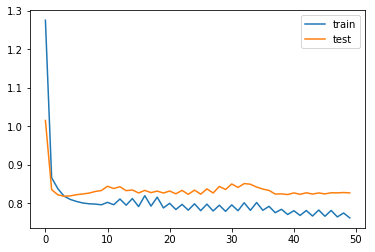

In [23]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(
    train_X, 
    train_y, 
    epochs=50, 
    batch_size=72, 
    validation_data=(test_X, test_y), 
    verbose=2, 
    shuffle=False
)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

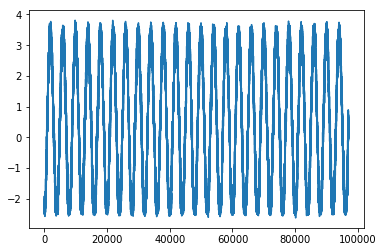

In [24]:
plt.plot(model.predict(test_X))